In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from datetime import datetime
from collections import Counter

# Use the `%matplotlib inline` command so that your plots show in the notebook _without_ having to call `plt.show()` every time.
%matplotlib inline

In [2]:
job_log = pd.read_table('data/july-2017-thru-june-2018.csv',sep='|',dtype='str')

In [3]:
job_log['Submit'] = pd.to_datetime(job_log['Submit'])
job_log['Start'] = pd.to_datetime(job_log['Start'])
job_log['Queue'] = job_log['Start'] - job_log['Submit']

In [4]:
job_log.ExitCode.value_counts(ascending=False).head(5000)

0:0      11429222
1:0        889623
127:0      112544
2:0         14560
4:0         10324
3:0          9403
6:0          8608
92:0         7693
9:0          5205
126:0        4175
11:0         2785
25:0         1509
7:0          1238
0:9           673
65:0          350
116:0         228
8:0           186
5:0           113
13:0          106
102:0          98
104:0          97
28:0           80
122:0          50
103:0          46
15:39          46
56:0           45
29:0           43
15:36          39
100:0          37
120:0          30
           ...   
125:0          18
119:0          12
46:0           10
12:0            9
109:0           9
0:11            7
121:0           7
17:0            6
23:0            6
20:0            6
0:15            6
66:0            4
99:0            4
73:0            3
39:0            3
108:0           3
0:4             3
63:0            3
90:0            2
124:0           2
16:0            2
0:7             2
0:6             2
47:0            1
41:0      

In [5]:
indices = np.random.randint(0,len(job_log),5000)
job_subset = job_log.iloc[indices]

In [12]:
job_sub2 = job_subset.ReqMem.value_counts(ascending=False).head(5000)
job_sub2.head(50)

5000Mn     982
28000Mn    775
2Gc        347
1024Mn     328
10Gn       305
8000Mn     261
16000Mn    240
2000Mn     156
4Gn        143
20Gn       138
16Gc       132
4000Mn     100
12000Mn     89
2Gn         81
1000Mn      81
8Gn         76
3Gn         64
4Gc         60
10Gc        55
0n          47
15Gc        44
5Gn         44
16Gn        44
24000Mn     43
1000Mc      35
20Gc        35
8Gc         25
20000Mn     24
6Gc         23
3Gc         18
30Gn        14
5Gc         12
10000Mn     11
40Gn        11
100Gn       10
15Gn        10
3000Mn       8
12Gn         8
32Gn         7
35Gn         7
6Gn          6
12Gc         6
50Gn         6
14000Mn      6
80Gn         5
12.50Gc      5
50000Mn      5
40000Mn      5
10Mc         5
25Gn         4
Name: ReqMem, dtype: int64

In [18]:
job_sub4 = job_log.ReqMem.value_counts(ascending=False).head(5000)
job_sub4.head(50)

5000Mn     2341060
28000Mn    2038338
2Gc         889885
1024Mn      808080
10Gn        745088
8000Mn      620378
16000Mn     615156
4Gn         378371
2000Mn      374385
20Gn        357188
16Gc        302912
4000Mn      254565
2Gn         233010
8Gn         204400
12000Mn     192714
3Gn         181551
1000Mn      170493
10Gc        141659
4Gc         136032
24000Mn     125973
5Gn         119814
15Gc        115911
0n          108668
20Gc         91248
16Gn         86223
1000Mc       76326
8Gc          53146
3Gc          49676
6Gc          46931
20000Mn      44406
3000Mn       40044
30Gn         38333
10000Mn      36948
15Gn         34340
40Gn         33143
5Gc          29063
50Gn         26093
12Gn         22630
35Gn         21964
6Gn          20455
1024Mc       20051
100Gn        19230
50000Mn      16832
14000Mn      14174
32Gn         14008
12Gc         13774
80Gn         12108
12.50Gc      11797
10Mc         11662
25Gn         10649
Name: ReqMem, dtype: int64

In [23]:
gig_type = job_subset['ReqMem'].str[-2:]
gig_type.unique()

array(['Mn', 'Gc', 'Gn', 'Mc', '0n'], dtype=object)

In [25]:
string = 'cpu=8,mem=100000M,node=1'
string.split(',')

['cpu=8', 'mem=100000M', 'node=1']

In [28]:
string.split(',')[1].lstrip('mem=')[:-1]

'100000'

In [29]:
string.split(',')[1].lstrip('mem=')[-1:]

'M'

In [38]:
job_sub3 = job_log.loc[(job_log['ReqMem']!='0n')]

In [10]:
job_sub5 = job_subset.loc[(job_subset['ReqMem']!='0n')]

In [11]:
job_sub5['mem_num'] = job_sub5['ReqTRES'].map(lambda x: x.split(',')[1].lstrip('mem=')[:-1])
job_sub5['mem_units'] = job_sub5['ReqTRES'].map(lambda x: x.split(',')[1].lstrip('mem=')[-1:])
job_sub5['mem_unit_value'] = job_sub5['mem_units'].map({'G': 1, 'M': 0.001,'T':1000})
job_sub5['total_mem'] = job_sub5['mem_unit_value'].astype('float') * job_sub5['mem_num'].astype('float')


C:\Users\abthomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\abthomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abthomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [40]:
job_sub5.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqTRES,Timelimit,NodeList,JobName,Queue,mem_num,mem_units,mem_unit_value,total_mem,que_time
5464164,21293035,21293035,accre,production,cms,cms,31000,cmsglidein,NaN,2017-11-16 03:16:11,...,"cpu=4,mem=28000M,node=1",2-00:00:00,None assigned,bl_3b3a4698d81c,00:59:21,28000,M,0.001,28.0,1970-01-01 00:59:21
6368079,22192987_1245,22196961,accre,production,p_meiler,p_meiler,10023,smithst,237602,2017-12-06 22:09:45,...,"cpu=1,mem=3G,node=1",01:00:00,vmp1089,dock.slurm,01:32:51,3,G,1.000,3.0,1970-01-01 01:32:51
6506997,22335879,22335879,accre,production,cms,cms,31000,cmsglidein,NaN,2017-12-12 00:52:34,...,"cpu=4,mem=28000M,node=1",2-00:00:00,None assigned,bl_3fff7535871b,00:44:31,28000,M,0.001,28.0,1970-01-01 00:44:31
8086888,23903076_5793,23915823,accre,production,cgg,cgg,59346,jiany17,NaN,2018-01-23 06:01:33,...,"cpu=1,mem=2G,node=1",01:00:00,vmp1368,run.jobarray.permute.sh,03:15:14,2,G,1.000,2.0,1970-01-01 03:15:14
3356245,19184938_91,19185029,accre,production,p_meiler,p_meiler,10023,kuenzeg,454080,2017-09-27 17:47:43,...,"cpu=1,mem=4G,node=1",2-12:00:00,vmp1316,q1_open_e1_dock,00:00:06,4,G,1.000,4.0,1970-01-01 00:00:06


In [16]:
job_sub5['que_time']= pd.to_datetime(job_sub5['Queue'])

C:\Users\abthomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

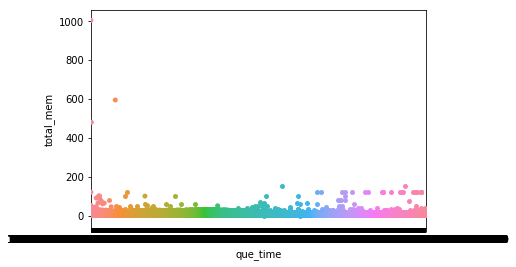

In [25]:
sns.swarmplot(x='que_time',y='total_mem',data=job_sub5);

In [27]:
indices_test = np.random.randint(0,len(job_sub5),100)
test_batch = job_sub5.iloc[indices_test]

In [46]:
job_sub5.nlargest(50,'Queue')
#job_sub5.Queue.value_counts(ascending=True).head(5000)

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,ReqTRES,Timelimit,NodeList,JobName,Queue,mem_num,mem_units,mem_unit_value,total_mem,que_time
4717022,20447998,20447998,accre,pascal,chbe285_gpu,mccabe_gpu,59295,yangah,497281,2017-10-29 13:29:30,...,"cpu=2,mem=2G,node=1,gres/gpu=1",4-00:00:00,gpu0017,sweep2/sim3,9 days 10:17:13,2,G,1.000,2.000,1970-01-10 10:17:13
3504253,19267902,19267902,accre,production,cms_lowprio,cms,31000,cmsglidein,NaN,2017-09-29 02:05:47,...,"cpu=4,mem=28000M,node=1",2-00:00:00,vmp1242,bl_19c721c942d7,8 days 03:27:23,28000,M,0.001,28.000,1970-01-09 03:27:23
3845262,19396137_839,19674036,accre,production,h_biostat_student,h_biostat_student,59331,chipmajj,229206,2017-10-02 07:18:25,...,"cpu=1,mem=4G,node=1",04:00:00,vmp1379,job_${SLURM_ARRAY_JOB_ID}_${SLURM_ARRAY_TASK_ID},6 days 09:23:21,4,G,1.000,4.000,1970-01-07 09:23:21
9097256,24700899_2471,24926175,accre,production,rokaslab,rokaslab,36087,moonj,232977,2018-02-12 16:36:54,...,"cpu=1,mem=1024M,node=1",00:30:00,vmp1067,slim_spinal-cord,6 days 00:29:26,1024,M,0.001,1.024,1970-01-07 00:29:26
4354135,19995641_27,20182941,accre,production,beam_lab,beam_lab,59350,deik,207302,2017-10-16 03:14:10,...,"cpu=1,mem=16000M,node=1",2-00:00:00,vmp1315,run.bat,5 days 22:21:45,16000,M,0.001,16.000,1970-01-06 22:21:45
8169203,23725253_189,23998138,accre,production,beam_lab,beam_lab,59350,deik,207302,2018-01-18 17:54:45,...,"cpu=1,mem=16000M,node=1",20:00:00,vmp1414,run_1.bat,5 days 21:58:09,16000,M,0.001,16.000,1970-01-06 21:58:09
8153959,23724722_28,23982894,accre,production,beam_lab,beam_lab,59350,deik,207302,2018-01-18 17:02:31,...,"cpu=1,mem=16000M,node=1",20:00:00,vmp1387,run_1.bat,5 days 13:58:52,16000,M,0.001,16.000,1970-01-06 13:58:52
2941875,18048717_4073,18762067,accre,production,lola,lola,59402,shockle,173433,2017-09-13 21:53:21,...,"cpu=1,mem=20G,node=1",05:00:00,vmp1085,AA_PGG,5 days 10:49:27,20,G,1.000,20.000,1970-01-06 10:49:27
5857293,21686213,21686213,accre,production,h_vuiis,h_vuiis,36052,vuiiscci,NaN,2017-11-23 22:04:01,...,"cpu=1,mem=40000M,node=1",4-00:00:00,vmp327,BLSA-x-BLSA_4690-x-BLSA_4690_01-0_10-x-DTI2-x-...,5 days 10:42:41,40000,M,0.001,40.000,1970-01-06 10:42:41
2938642,18048717_3559,18758834,accre,production,lola,lola,59402,shockle,173433,2017-09-13 21:53:21,...,"cpu=1,mem=20G,node=1",05:00:00,vmp1103,AA_PGG,5 days 07:06:15,20,G,1.000,20.000,1970-01-06 07:06:15


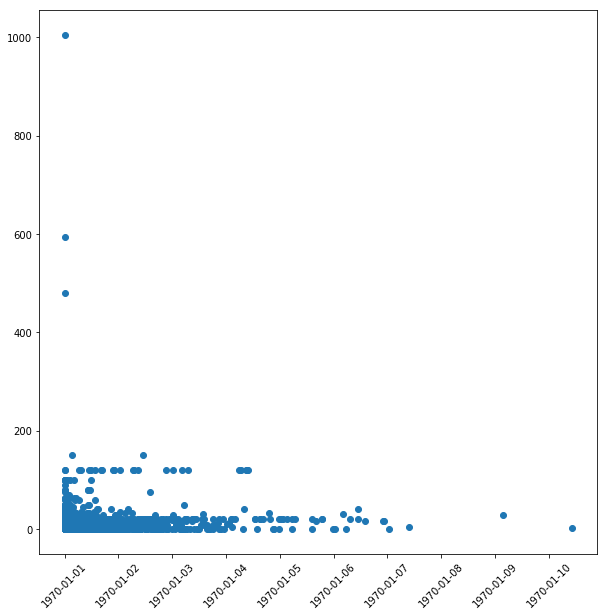

In [39]:
#plt.scatter(test_batch['que_time'], test_batch['total_mem']);
#figsize = (6,20)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.xticks(rotation=)
ax.plot_date(x=job_sub5.que_time, y=job_sub5.total_mem, marker='o');

try converting queue to seconds/minutes or hours to plot appropriately